In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import cv2
from matplotlib import pyplot as plt

In [4]:
from PIL import Image
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

In [7]:
img= cv2.imread("../input/license-plate-characters-dataset/data/testing/class_B/class_B_1.jpg")

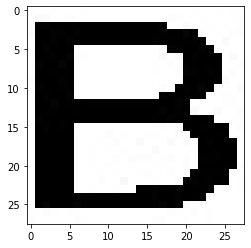

In [8]:
plt.imshow(img)

In [9]:
img.shape

(28, 28, 3)

In [10]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    '../input/license-plate-characters-dataset/data/training',
    target_size=(28, 28),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale',
    subset='training') # set as training data

Found 677 images belonging to 36 classes.


In [11]:
validation_generator = train_datagen.flow_from_directory(
    '../input/license-plate-characters-dataset/data/training',
    target_size=(28, 28),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale',
    subset='validation') # set as validation data

Found 136 images belonging to 36 classes.


In [12]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
test_set = test_datagen.flow_from_directory('../input/license-plate-characters-dataset/data/testing',
                                            target_size=(28, 28),
                                            batch_size=32,
                                            class_mode='categorical',
                                            color_mode='grayscale',
                                                    shuffle=False)

Found 216 images belonging to 36 classes.


In [14]:
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, Activation
from keras import optimizers
from keras_preprocessing.image import ImageDataGenerator
from keras.models import load_model
import tensorflow as tf

In [15]:
model = keras.Sequential([
        
        # Add first Convolutional Layer
        layers.Conv2D(filters=32, kernel_size=3, activation='relu',
                      padding='same', input_shape=(28,28,1)),
        # Add a second Convolutional Layer
        layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
        # Add a Max pooling layer
        layers.MaxPool2D(pool_size=(2, 2)),
        # Add a Dropout layer
        layers.Dropout(0.25),
    
        layers.BatchNormalization(),
        # Add third Convolutional Layer
        layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding = 'same'),
        # Add Fourth Convolutional Layer
        layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
        # Add a Max pooling layer
        layers.MaxPool2D(pool_size=(2, 2)),
        # Add a Dropout Layer
        layers.Dropout(0.25),

        layers.BatchNormalization(),
        # Add a Flatten Layer
        layers.Flatten(),
        # Add a Dense layer Layer
        layers.Dense(128, activation = 'relu'),
        layers.Dense(256, activation = 'relu'),
        # Add a Dropout Layer
        layers.Dropout(0.5),
        # Add the Output Dense Layer
        layers.Dense(36, activation='softmax')
])

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 13, 13, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        3

In [18]:
from keras.utils.vis_utils import plot_model

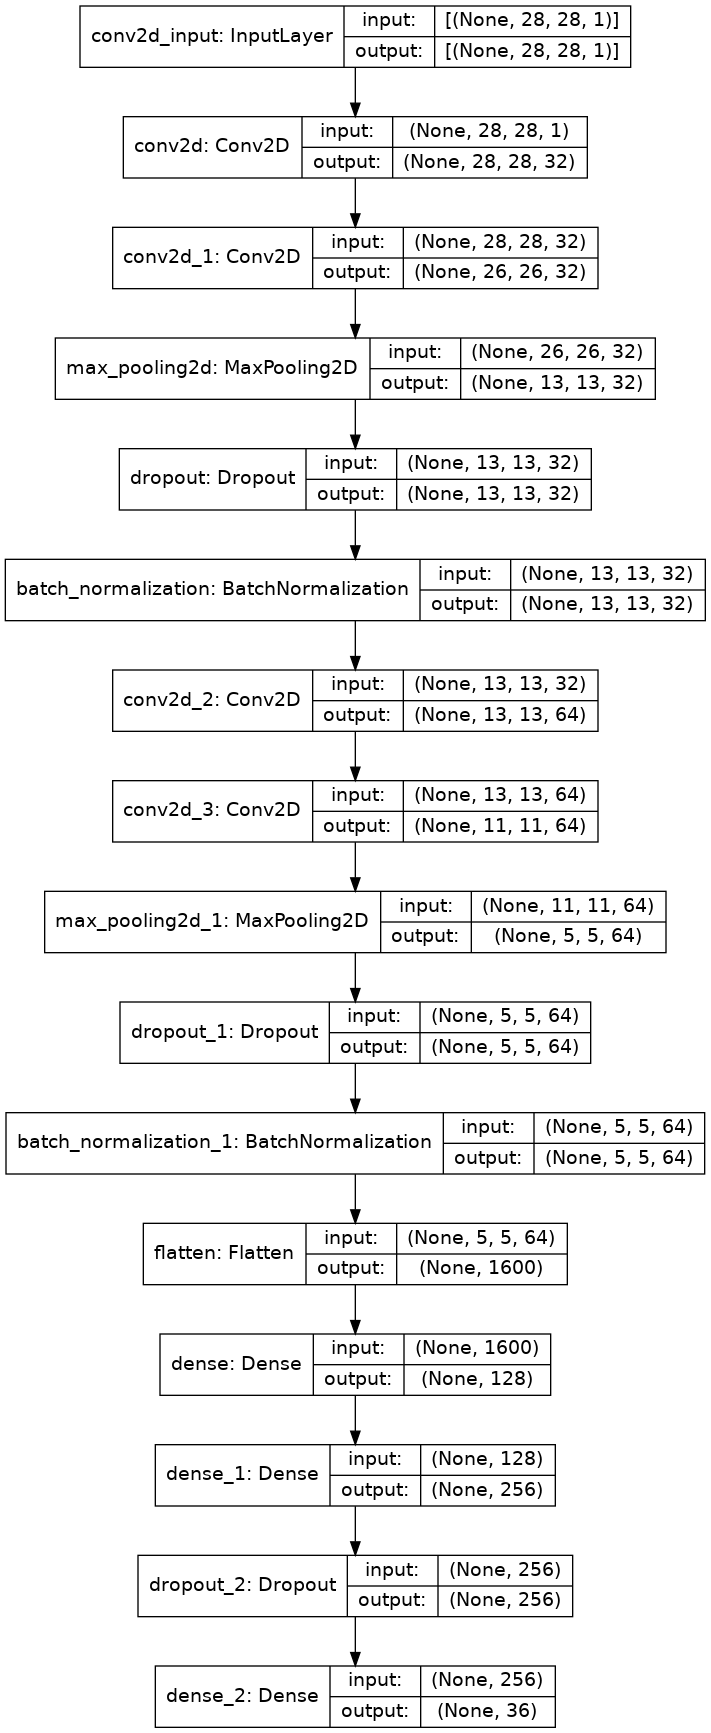

In [19]:
keras.utils.plot_model(model,  show_shapes=True)

In [20]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [21]:
model_checkpoint = ModelCheckpoint("./model/", save_best_only=True, verbose=1, monitor='val_accuracy', mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=3, verbose=1, mode='auto')

In [22]:
with tf.device('/GPU:0'):
    history=model.fit(x=train_generator, validation_data=test_set, epochs=35,shuffle= True,callbacks=[model_checkpoint, reduce_lr])

Epoch 1/35
22/22 [==============================] - 7s 123ms/step - loss: 3.7954 - accuracy: 0.0408 - val_loss: 3.5639 - val_accuracy: 0.0509

Epoch 00001: val_accuracy improved from -inf to 0.05093, saving model to ./model/
Epoch 2/35
22/22 [==============================] - 1s 44ms/step - loss: 2.7145 - accuracy: 0.2422 - val_loss: 3.4837 - val_accuracy: 0.0556

Epoch 00002: val_accuracy improved from 0.05093 to 0.05556, saving model to ./model/
Epoch 3/35
22/22 [==============================] - 1s 41ms/step - loss: 1.4407 - accuracy: 0.5969 - val_loss: 3.3873 - val_accuracy: 0.0370

Epoch 00003: val_accuracy did not improve from 0.05556
Epoch 4/35
22/22 [==============================] - 1s 40ms/step - loss: 0.7840 - accuracy: 0.7575 - val_loss: 3.2812 - val_accuracy: 0.1019

Epoch 00004: val_accuracy improved from 0.05556 to 0.10185, saving model to ./model/
Epoch 5/35
22/22 [==============================] - 1s 40ms/step - loss: 0.5886 - accuracy: 0.8278 - val_loss: 3.1292 - val_

model.evaluate(validation_generator)

In [23]:
model.evaluate(validation_generator)

5/5 [==============================] - 0s 87ms/step - loss: 0.2228 - accuracy: 0.9485


[0.22281359136104584, 0.9485294222831726]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


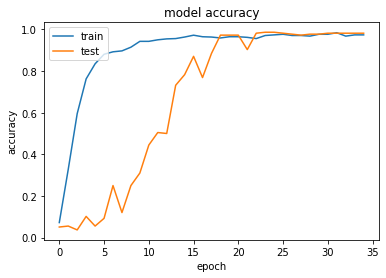

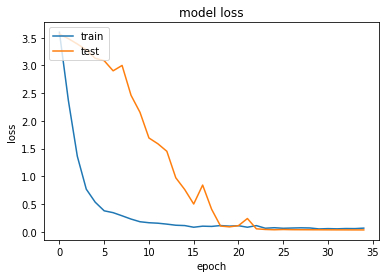

In [24]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
model.save("./model_1.h5")
model.save_weights("./weight_1.h5")
print("Saved model to disk")

Saved model to disk
